# Find the best regression model (try your best) for the diabetes dataset. 

In [ ]:
# !pip install sklearn
from IPython.display import clear_output
import pandas as pd
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_validate
from sklearn.metrics import *

2.4.0


In [ ]:
#load data
data_x,data_y = load_diabetes(return_X_y=True)
print(data_x[0])
print(data_y[0])
print(data_x.shape)
print(data_y.shape)


[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
151.0
(442, 10)
(442,)


In [ ]:
x_train=data_x[400:]
x_test=data_x[:-42]
y_train=data_y[400:]
y_test=data_y[:-42]

In [ ]:
#define model
x = keras.Input(shape=(10,))
h1 = layers.Dense(64, activation='relu')(x)
d=layers.Dropout(rate=0.2)(h1)
h2 = layers.Dense(64, activation='relu')(d)
h3 = layers.Dense(32, activation='relu')(h2)
outputs = layers.Dense(1)(h3)
nn_model = keras.Model(inputs=x, outputs=outputs,name='nn_network')
nn_model.summary()
nn_model.compile(optimizer='adam',loss="huber",metrics=['mse','mae'])

Model: "nn_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 6,977
Trainable params: 6,977
Non-trainable params: 0
______________________________________________________

In [ ]:
# #define model
# x = keras.Input(shape=(10,))
# h1 = layers.Dense(12, activation='relu')(x)
# h2 = layers.Dense(8, activation='relu')(h1)
# h3 = layers.Dense(3, activation='relu')(h2)
# outputs = layers.Dense(1)(h3)
# nn_model = keras.Model(inputs=x, outputs=outputs,name='nn_network')
# nn_model.summary()
# nn_model.compile(optimizer='adam',loss="huber",metrics=['mse','mae'])

In [ ]:
history = nn_model.fit(x_train,y_train,
              batch_size=20, epochs=1000, verbose=0,
              validation_data=(x_test,y_test),)

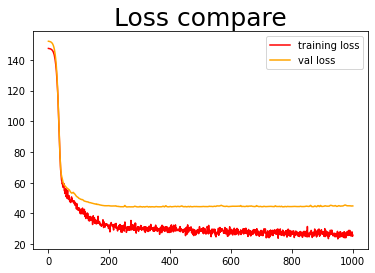

In [ ]:
loss_pic=np.array([])
acc_pic=np.array([])
val_pic=np.array([])
plt.title("Loss compare",fontsize=25,)

loss_pic=history.history['loss']
val_pic=history.history['val_loss']

ep=range(1,len(loss_pic)+1)
plt.plot(ep,loss_pic,"red",label="training loss")
plt.plot(ep,val_pic,"orange",label="val loss")
plt.legend()
plt.show()

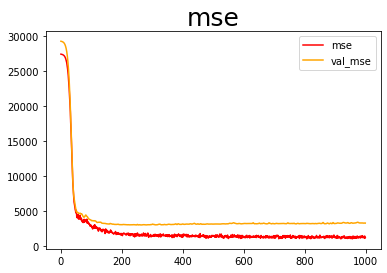

In [ ]:
plt.title("mse",fontsize=25,)
plt.plot(history.history['mse'],"red",label="mse")
plt.plot(history.history['val_mse'],"orange",label="val_mse")
plt.legend()
plt.show()

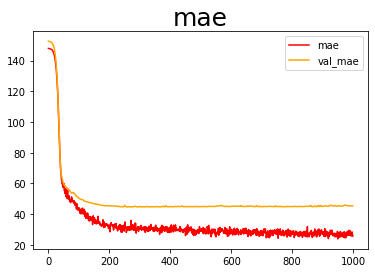

In [ ]:
plt.title("mae",fontsize=25,)
plt.plot(history.history['mae'],"red",label="mae")
plt.plot(history.history['val_mae'],"orange",label="val_mae")
plt.legend()
plt.show()

In [ ]:
nn_model.predict(np.array([data_x[0]]))

array([[188.47832]], dtype=float32)

# Is “Average blood pressure” an important factor for diabetes disease? Explain this by crossvalidations.

In [ ]:
# !pip install sklearn
from IPython.display import clear_output
import pandas as pd
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_validate
from sklearn.metrics import *

2.4.0


In [ ]:
#load data
data_x,data_y = load_diabetes(return_X_y=True)
print(data_x[0])
print(data_y[0])
print(data_x.shape)
print(data_y.shape)


[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
151.0
(442, 10)
(442,)


In [ ]:
#define model for data with "Average blood pressure"
x = keras.Input(shape=(10,))
h1 = layers.Dense(64, activation='relu')(x)
d=layers.Dropout(rate=0.2)(h1)
h2 = layers.Dense(64, activation='relu')(d)
h3 = layers.Dense(32, activation='relu')(h2)
outputs = layers.Dense(1)(h3)
nn_model = keras.Model(inputs=x, outputs=outputs,name='nn_network')
nn_model.summary()
nn_model.compile(optimizer='adam',loss="huber",metrics=['mse','mae'])

Model: "nn_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                704       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 6,977
Trainable params: 6,977
Non-trainable params: 0
______________________________________________________

In [ ]:
with_blood_avg_loss=0
with_blood_avg_mse=0
with_blood_avg_mae=0
kf=KFold(n_splits=5,shuffle=True)
for train_index,test_index in kf.split(data_x):
    x_train,x_test=data_x[train_index],data_x[test_index]
    y_train,y_test=data_y[train_index],data_y[test_index]
    history = nn_model.fit(x_train,y_train,
              batch_size=20, epochs=200, verbose=0,
              validation_data=(x_test,y_test),)
            #   callbacks=[cb()])
    lo,mse,mae=nn_model.evaluate(x_test,y_test)
    with_blood_avg_loss+=lo
    with_blood_avg_mse+=mse
    with_blood_avg_mae+=mae
print(with_blood_avg_loss/5,with_blood_avg_mse/5,with_blood_avg_mae/5)

3/3 [==============================] - 0s 3ms/step - loss: 38.9455 - mse: 2637.1819 - mae: 39.4405
42.195526885986325 2948.253564453125 42.693190002441405


In [ ]:
res1=nn_model.predict(x_test)
res1[0]

array([110.64066], dtype=float32)

In [ ]:
x = keras.Input(shape=(9,)) # model for data without "Average blood pressure"
h1 = layers.Dense(64, activation='relu')(x)
d=layers.Dropout(rate=0.2)(h1)
h2 = layers.Dense(64, activation='relu')(d)
h3 = layers.Dense(32, activation='relu')(h2)
outputs = layers.Dense(1)(h3)
nn_model = keras.Model(inputs=x, outputs=outputs,name='nn_network')
nn_model.summary()

Model: "nn_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                640       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 6,913
Trainable params: 6,913
Non-trainable params: 0
______________________________________________________

In [ ]:
nn_model.compile(optimizer='adam',loss="huber",metrics=['mse','mae'])
loss=0
mse_sum=0
mae_sum=0
data_x=np.delete(data_x,np.s_[3],1)
kf=KFold(n_splits=5,shuffle=True)
for train_index,test_index in kf.split(data_x):
    x_train,x_test=data_x[train_index],data_x[test_index]
    y_train,y_test=data_y[train_index],data_y[test_index]
    history = nn_model.fit(x_train,y_train,
              batch_size=20, epochs=200, verbose=0,
              validation_data=(x_test,y_test),)
            #   callbacks=[cb()])
    lo,mse,mae=nn_model.evaluate(x_test,y_test)
    loss+=lo
    mse_sum+=mse
    mae_sum+=mae
print(loss/5,mse_sum/5,mae_sum/5)

3/3 [==============================] - 0s 4ms/step - loss: 41.2470 - mse: 2913.0771 - mae: 41.7470
44.19767456054687 3191.7806640625 44.69499893188477


In [ ]:
res2=nn_model.predict(x_test)
res2[0]

array([93.87444], dtype=float32)

In [ ]:
print('with blood pressure data and no blood pressure data loss compare')
print("avg_loss",with_blood_avg_loss/5, loss/5)
print("avg_mse", with_blood_avg_mse/5,mse_sum/5)
print("avg_mae", with_blood_avg_mae/5,mae_sum/5)

with blood pressure data and no blood pressure data loss compare
avg_loss 42.195526885986325 44.19767456054687
avg_mse 2948.253564453125 3191.7806640625
avg_mae 42.693190002441405 44.69499893188477


By the result above
Data with "Average blood pressure" will have less loss than data without  "Average blood pressure" ,so "Average blood pressure" is an important factor for diabetes disease



# Bonus: use auto-sklearn or AutoKeras to search for a good regression model automatically.

In [ ]:
!pip install autokeras
import sklearn.model_selection
import sklearn.metrics
import sklearn.datasets
import autokeras as ak
from autokeras import StructuredDataRegressor
from sklearn.datasets import load_diabetes

     |████████████████████████████████| 174kB 5.7MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78939 sha256=f13a7f92107cb7683ff45cd86417c5e5fc062a944b063706bf3d9b05438abc55
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15358 sha256=6cfe22e4ca3029375964c9c26650b2c84211eda13df87b35927b70424b368d2e
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
data_x,data_y = load_diabetes(return_X_y=True)
x_train=data_x[400:]
x_test=data_x[:-42]
y_train=data_y[400:]
y_test=data_y[:-42]

In [ ]:
search = StructuredDataRegressor(max_trials=15,metrics=["mae","mse"])
history=search.fit(x=x_train, y=y_train,validation_data=(x_test,y_test),verbose=0)

INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Assets written to: ./structured_data_regressor/best_model/assets


In [ ]:
import numpy as np
pred=search.predict(np.array([x_test[0]]))
print(pred,y_test[0])

[[179.47102]] 151.0


In [ ]:
model=search.export_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
multi_category_encoding (Mul (None, 10)                0         
_________________________________________________________________
normalization (Normalization (None, 10)                21        
_________________________________________________________________
dense (Dense)                (None, 32)                352       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0     